Blurred image is saved as 'blurred_image.png'


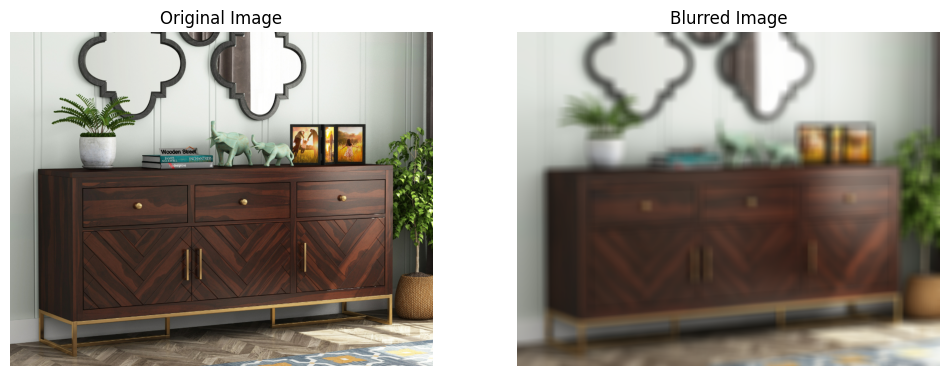

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def box_blur_image(image_path, blur_size, increase_blur_factor=1):
    # Load image and convert to array
    image = Image.open(image_path)
    image = np.array(image, dtype=float)
    original_image = Image.fromarray(np.clip(image, 0, 255).astype(np.uint8))

    # Define the kernel with an increased blur factor
    kernel_size = blur_size * increase_blur_factor
    kernel = np.ones((kernel_size, kernel_size, 1)) / (kernel_size**2)

    # Padding the image
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='edge')

    # Initialize the blurred image array
    blurred_image = np.zeros_like(image)

    # Apply the box blur (convolution)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Compute the sum for each channel
            for k in range(image.shape[2]):
                blurred_image[i, j, k] = (kernel[:, :, 0] * padded_image[i:i+kernel_size, j:j+kernel_size, k]).sum()

    # Convert back to uint8 for display and saving
    blurred_image = np.clip(blurred_image, 0, 255).astype(np.uint8)
    blurred_image_pil = Image.fromarray(blurred_image)
    blurred_image_pil.save('blurred_image.png')
    print("Blurred image is saved as 'blurred_image.png'")

    # Display both images side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(blurred_image_pil)
    plt.title('Blurred Image')
    plt.axis('off')

    plt.show()

# Example usage
box_blur_image(r"C:\Users\arpit\Pictures\Screenshots\Screenshot 2023-04-09 211822.png", 5, 4)  # Adjust the path to your image file path, increase_blur_factor=2 for more blur